# Gillespie Algorithm for Reaction Equations

## Defining Class to solve system
This block of code creates a class that will be used to solve reaction equations using the Gillespie algorithm. I will later on create a separate .py file from which we import this block of code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Gillespie import EvolutionGillespie

## Lotka-Volterra Model
In this block of code we simulate the simple Lotka-Volterra model. 

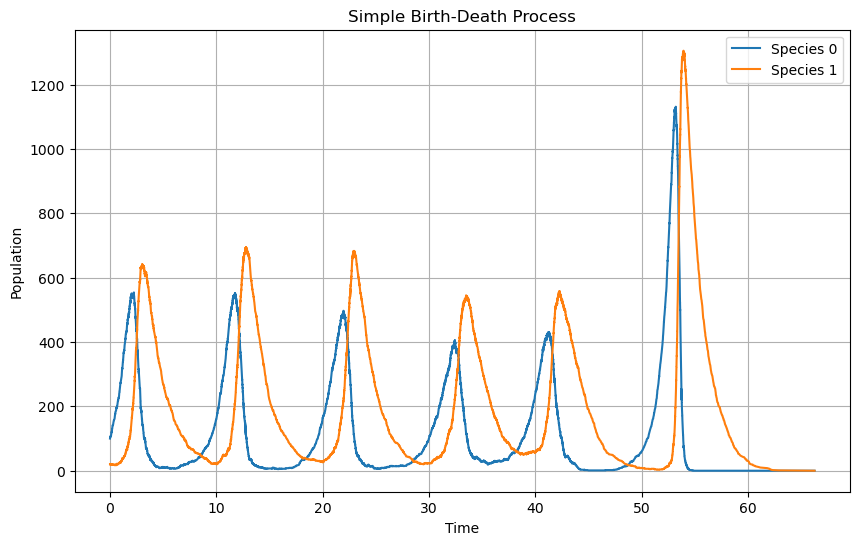

In [4]:
# Example: Simple Lotka-Volterra
number_species = 2
coeff = [1, 0.005, 0.6]  # Reaction rates: birth and death

reactions = np.array([
    # Ingoing
    [[1, 0], [1, 1], [0, 1]],  
    # Outgoing
    [[2, 0], [0, 2], [0, 0]]
])

title = "Simple Birth-Death Process"

# Create the system
LotkaVolterra = EvolutionGillespie(number_species, coeff, reactions, title)

# Simulate
initial_state = [100, 20]  # Start with 10 individuals of species 0
t_max = 400
times, populations = LotkaVolterra.simulate(initial_state, t_max)

# Plot the evolution of species 0 and 1
fig, ax = LotkaVolterra.plot_species(times, populations, 0, 1)
plt.show()

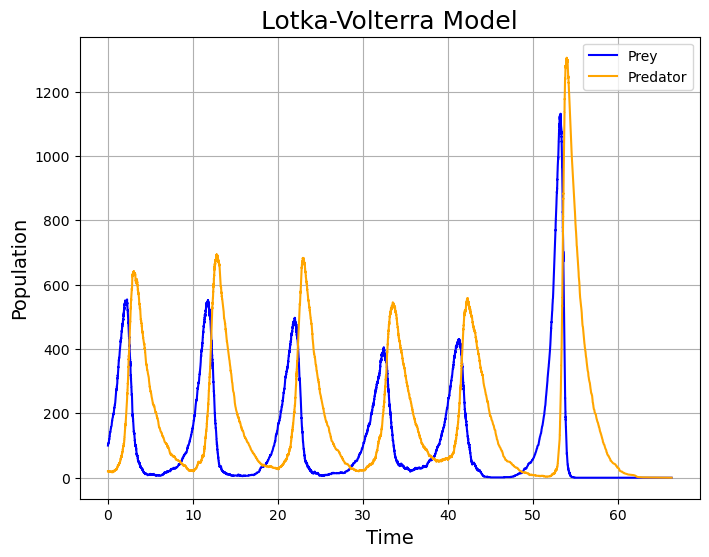

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
populations = np.array(populations)
ax.plot(times, populations[:, 0], color='blue', label='Prey')
ax.plot(times, populations[:, 1], color='orange', label='Predator')
ax.grid()
ax.legend()
ax.set_title('Lotka-Volterra Model', fontsize=18)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
fig.savefig('Plots/ex15_LotkaVolterra_evolution.png', dpi=300)

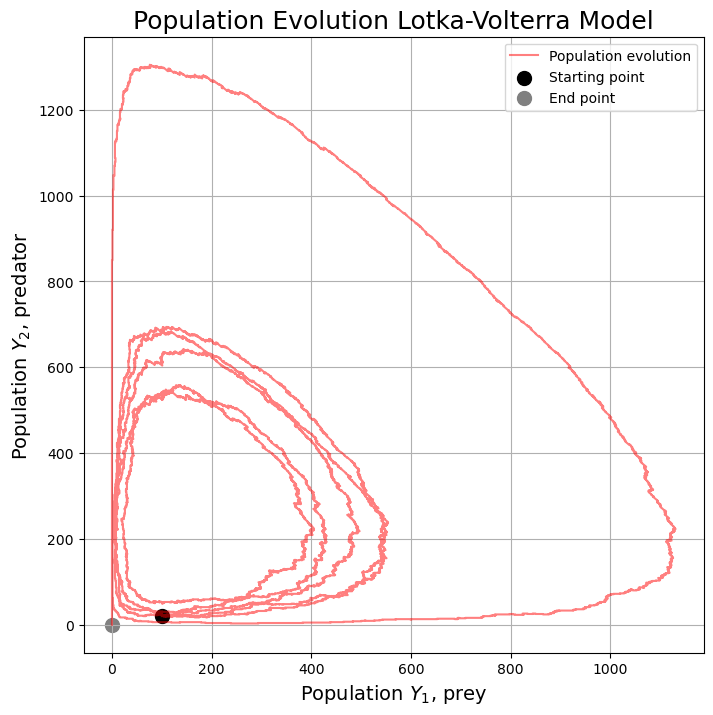

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(populations[:,0], populations[:, 1], color='red', alpha=0.5, label='Population evolution')
ax.scatter(populations[0, 0], populations[0, 1], s=100, color='black', label='Starting point')
ax.scatter(populations[-1, 0], populations[-1, 1], s=100, color='gray', label='End point')
ax.set_xlabel(r'Population $Y_1$, prey', fontsize=14)
ax.set_ylabel(r'Population $Y_2$, predator', fontsize=14)
ax.set_title('Population Evolution Lotka-Volterra Model', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/ex15_Lotka_volterra_each_other', dpi=300)

## Brusselator Model
This code is concerned with evolving the brusselator problem, containing 4 reaction equations.

In [11]:
# Brusselator model
number_species = 2
coeff = [5*10**3, 50, 5*10**(-5), 5] 

reactions = np.array([
    [[0, 0], [1, 0], [2, 1], [1, 0]],  
    [[1, 0], [1, 0], [3, 0], [0, 0]]
])
title = "Brusselator model"

# Create the system
brusselator = EvolutionGillespie(number_species, coeff, reactions, title)

In [ ]:
# Simulate
initial_state = [1000, 2000]  
t_max = 10
times, populations = brusselator.simulate(initial_state, t_max)

In [ ]:
# Plot the evolution of species 0 and 1
fig, ax = brusselator.plot_species(times, populations, 0, 1)
plt.show()

In [ ]:
fig, ax = brusselator.plot_species_against_each_other(populations, 0, 1)

In [ ]:
initial_state = [1000, 2000]  
t_max = 10

fig, ax = plt.subplots(1,1, figsize(8,8))

for i in range(10):
    times, populations = brusselator.simulate(initial_state, t_max)
    populations = np.array(populations)
    ax.plot(populations[:,0], populations[:,1], color='red', alpha=0.5, label='Sampling '+str(i+1))
ax.scatter(populations[0, 0], populations[0, 1], s=100, color='black', label='Starting point')
#ax.scatter(populations[-1, 0], populations[-1, 1], s=100, color='gray', label='End point')
ax.set_xlabel(r'Population $Y_1$', fontsize=14)
ax.set_ylabel(r'Population $Y_2$', fontsize=14)
ax.set_title('Population Evolution Brusselat Model', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/ex15_Lotka_volterra_each_other', dpi=300)

## Birth-Annihilation Process
This block of code is concerned with the birth annihilation model of exercise 4.14


In [ ]:
# Birth - Annihilation model
number_species = 1
coeff = [1, 0.2] 

reactions = np.array([
    [[1], [1]],  
    [[0], [2]]
])
title = "Birth-Annihilation model"

# Create the system
BirthAnnihilation = EvolutionGillespie(number_species, coeff, reactions, title)

In [ ]:
# Simulate
initial_state = [100]  
t_max = 10
for i in range(10):
    times, populations = BirthAnnihilation.simulate(initial_state, t_max)

In [ ]:
# Plot behaviour

initial_state = [10000]  
t_max = 15

fig, ax = plt.subplots(1,1, figsize=(8,6))
for i in range(10):
    times, populations = BirthAnnihilation.simulate(initial_state, t_max)
    ax.plot(times, populations, color='blue', alpha=0.5, label='Sample '+str(i+1))
time = np.linspace(0, 10, 1000)
mu = coeff[1]
lambd = coeff[0]
exp = 10000*np.exp((mu-lambd)*time)
ax.plot(time, exp, color='red', linewidth=1.5, label='Average behaviour')
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('Population', fontsize=13)
ax.set_title(title, fontsize=18)
ax.legend()
ax.grid()
fig.savefig('Plots/BirthAnnihilation_samples_10000.png', dpi=250)

In [ ]:
# annihilation times

annihilation_times = []
for i in range(1000):
    times, populations = BirthAnnihilation.simulate(initial_state, 20)
    k = 0
    while populations[k] != [0]:
        k += 1
    annihilation_times.append(times[k])

In [ ]:
plt.hist(annihilation_times, density=True, label='Annihilation Time')
plt.xlabel('Annihilation Time', fontsize=13)
plt.ylabel('Normalized counts', fontsize=13)
plt.title('Histogram of Annihilation Times', fontsize=18)
plt.legend()
plt.savefig('Plots/ex14_histogram', dpi=300)